### In this notebook we are going to classify survived vs not survived people from the titanic dataset with the help of logistic regression 
The steps need to do are as follows

In [72]:
# imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [73]:
# reading the csv file into the titanic variable 
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
# let's describe the data
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [76]:
titanic.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

### let's explore the data 

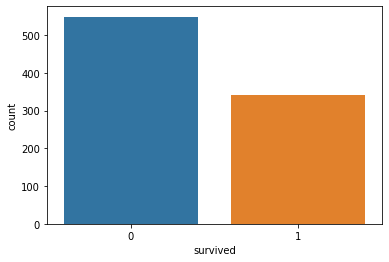

less number of passenger was really able to survive


In [77]:
# plot the survived vs not plot using countplot
sns.countplot(x='survived', data=titanic)
plt.show()
print('less number of passenger was really able to survive')


In [78]:
titanic.groupby(['survived', 'sex'])['survived'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: survived, dtype: int64

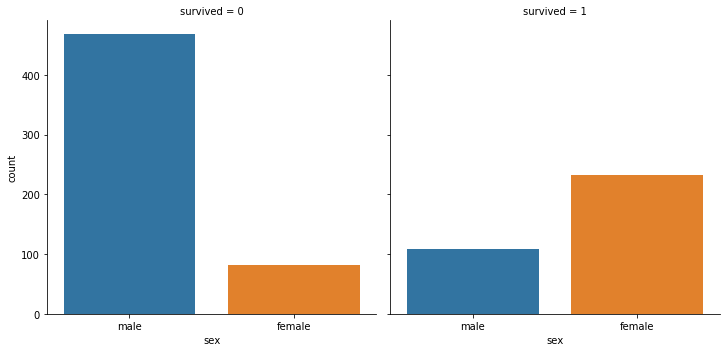

In [79]:
# let's plot the data which survived vs not according to sex
sns.catplot(x='sex', col='survived', kind='count', data=titanic)

##### survived rate of female was more than that of male, we have also watched it in movie that they first let go females and child in the movie while males were hanging there to survive

In [80]:
print('% of women survived:',titanic[titanic.sex=='female'].survived.sum()/titanic.survived.sum())
print('% of men survived:',titanic[titanic.sex=='male'].survived.sum()/titanic.survived.sum())

% of women survived: 0.6812865497076024
% of men survived: 0.31871345029239767


#### Passenger Class : Survival rate decreases with Pclass

In [81]:
pd.crosstab(titanic.pclass, titanic.survived, margins=True).style.background_gradient(cmap='autumn_r')

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


cross tab shows the data of pclass with survived so according to that following are the percentage of survival 

In [82]:
print("% of survivals in") 
print("Pclass=1 : ", titanic.survived[titanic.pclass == 1].sum()/titanic[titanic.pclass == 1].survived.count())
print("Pclass=2 : ", titanic.survived[titanic.pclass == 2].sum()/titanic[titanic.pclass == 2].survived.count())
print("Pclass=3 : ", titanic.survived[titanic.pclass == 3].sum()/titanic[titanic.pclass == 3].survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


#### Embarked : Survival rate lowest for S and highest for C

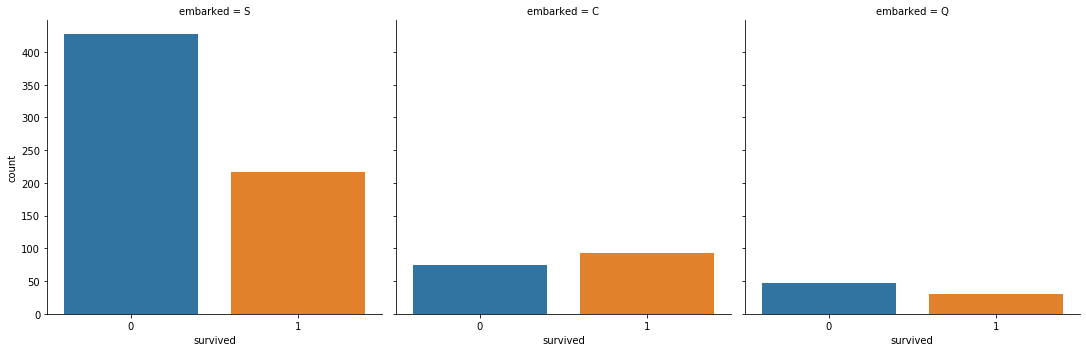

In [83]:
sns.catplot(x='survived', col='embarked', kind='count', data=titanic);


from s there were lot's of passengers but still there survival rate was the lowest and from the C more than 50% of them survived.

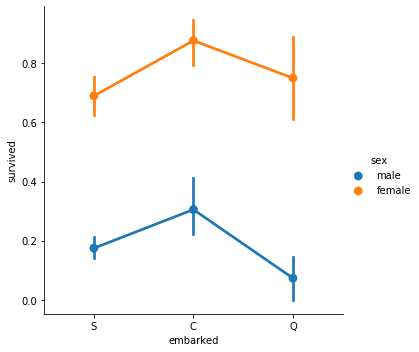

In [84]:
sns.catplot('embarked','survived', kind='point', hue='sex', data=titanic)


here it is clear that female mostly of embark C are survived but the male has low survival rate in three of the cases 


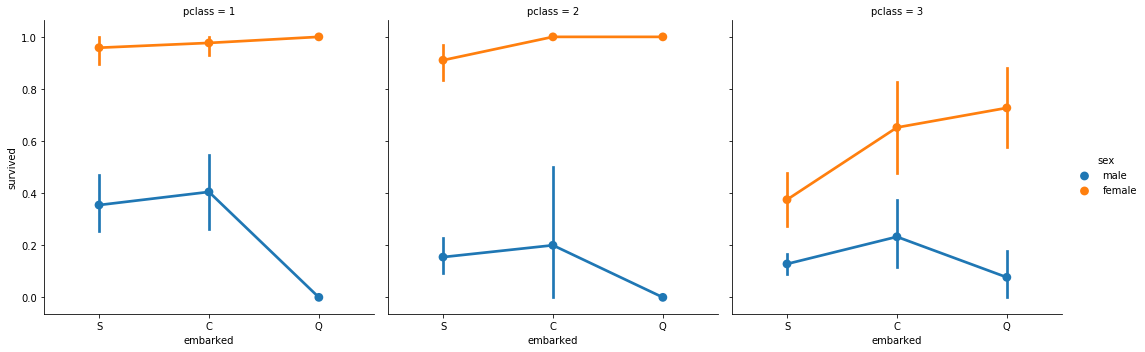

In [85]:
sns.catplot('embarked','survived', col='pclass', hue= 'sex', kind='point', data=titanic)

#### so all the womens from pclass 1 & 2  with embark Q survived 
#### And al the men from pclass 1, 2 & 3 who were embarked in Q died 


In [86]:
# let's do some exploration with the help of Age 


In [87]:
## oops we have Null value there .. let's find null value present in our dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [88]:
# so 177 values present in the age are NaN 
# let's deal with this 
# we know, we have pclass from where we can calculate roughly how the age is ranging 


In [89]:
titanic[['pclass', 'age']]

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [90]:
titanic.groupby(['parch']).age.mean()
    

parch
0    32.178503
1    24.422000
2    17.216912
3    33.200000
4    44.500000
5    39.200000
6    43.000000
Name: age, dtype: float64

In [91]:
# creating a function to find the missing value in age .. so I used parch since parch is of 7 types I tried to include 
# them with their age 
def approx_age(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0 :
            return 32
        elif Parch == 1 :
            return 24
        elif Parch == 2 :
            return 17
        elif Parch == 3 :
            return 33 
        elif Parch == 4 :
            return 44
        else : 
            return 40
    else: 
        return Age
    

In [92]:
titanic['age'] = titanic[['age', 'parch']].apply(approx_age, axis=1)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [93]:
## embark has 2 Null value
# first we will drop the table deck
titanic.drop('deck', axis=1, inplace=True)
titanic.dropna(inplace=True)

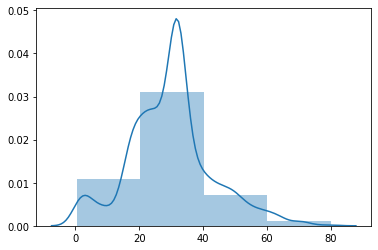

In [94]:
# checking the distribution of the age 
sns.distplot(titanic[['age']], bins= 4)

In [95]:

titanic.fare.count()

889

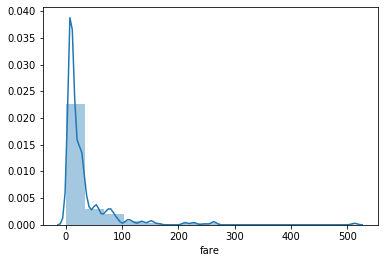

In [96]:
# distribution of fare 
sns.distplot(titanic.fare, bins=15)

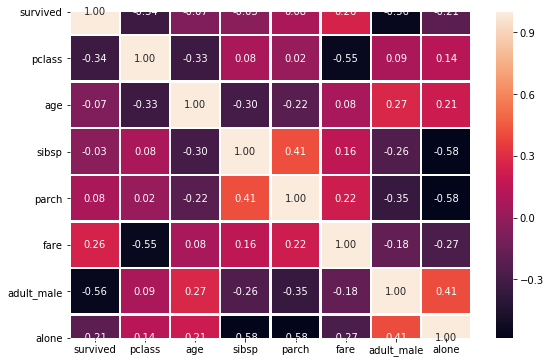

In [97]:
# to find the corrrelation between the variables
corr = titanic.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

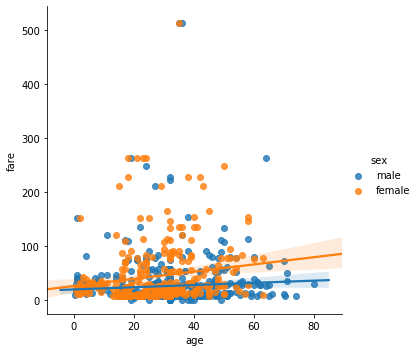

In [98]:
 sns.lmplot(x="age", y="fare",hue="sex",data=titanic)

just being curious I tried to plot the graph of fare and how much it cost according to gender .. so it turned out female spends slightly more on the fare than the male even they were less in numbers

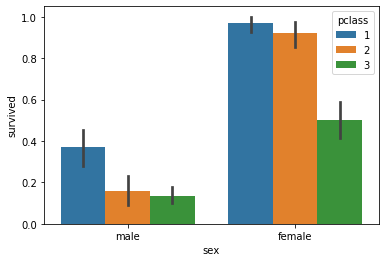

In [99]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic)

from class 1 most of the female survived and from class 3 only 10% of the male survived.


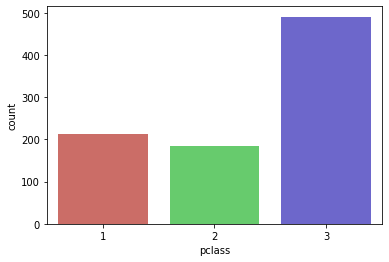

counts of class 3 is more than that of other to class combined


In [100]:
sns.countplot(x='pclass', data=titanic, palette='hls')
plt.show()
print('counts of class 3 is more than that of other to class combined')

In [101]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [102]:
titanic.groupby(['adult_male', 'who']).sum()

survived  pclass       age  sibsp  parch        fare  alone
adult_male who                                                               
False      child        49     218    528.67    144    105   2721.2210    6.0
           woman       203     563   8427.00    163    153  12460.6627  119.0
True       man          88    1274  17569.50    159     82  13352.0656  410.0

## Let's do the data Wrangling 

In [103]:
# let's drop the unnecessary columns
col = ['alive', 'alone', 'adult_male', 'who', 'embark_town', 'class']
data =titanic.drop(col, axis=1)

In [104]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,17.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### As the some of the independent are of categorical in form, convert them in to 1's and 0's

In [105]:
# let's create one hot encoding  using get dummies
col_to_get_dummies = ['sex', 'embarked']
dummie = []
for i in col_to_get_dummies:
    dummie.append(pd.get_dummies(titanic[i], drop_first=True))
    

In [106]:
data.drop(['sex', 'embarked'], axis=1, inplace=True)
data_dmy = pd.concat([data, dummie[0], dummie[1]], axis=1)
data_dmy.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [107]:
data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


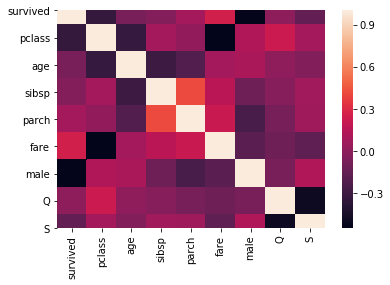

In [108]:
# heatmap of correlation matrix
sns.heatmap(data_dmy.corr())


## Let's divide the data into x & y

In [109]:
x = data_dmy.drop(['survived'], axis=1)
y = data_dmy['survived']

### imports 
* train_test_split spliting the data
* LogisticRegression for fitting model and classification
* confusion_matrix for creating metrics
* classification_report generation of report which has information of accuracy,  precision,    recall,  f1-score,   support
* GridSearchCV for hyper-parameter tunning, this import will take various parameter and tries to optimize the model as possible  

In [110]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [111]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# removing warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# creating as instance of logitic regression
Log_R = LogisticRegression()

In [112]:
# fitting the model wiht x_training and y_training 
Log_R.fit(x_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [113]:
# predictions with x_test
y_pred = Log_R.predict(x_test)

In [114]:
# Accuracy of logistci regression
print('Accuracy with training dataset ',Log_R.score(x_train, y_train))
print('Accuracy with test dataset',Log_R.score(x_test, y_test))

Accuracy with training dataset  0.8073136427566807
Accuracy with test dataset 0.8033707865168539


In [115]:
# confusion matrix an classify report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
print('confusion matrix\n',confusion_matrix(y_test, y_pred))

confusion matrix
 [[86 17]
 [18 57]]


In [116]:
print('classificatio report \n',classification_report(y_test, y_pred))

classificatio report 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.77      0.76      0.77        75

    accuracy                           0.80       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.80      0.80      0.80       178



In [117]:
# findind true negative false positive false negative and true positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [118]:
print(tn,fp,fn,tp)

86 17 18 57


In [119]:
# let's calculate probability of predicted output
probab_pred = Log_R.predict_proba(x_test)[::, 1]
print('probability of getting positive\n',probab_pred)

probability of getting positive
 [0.13940968 0.22427171 0.10385661 0.47400561 0.08213536 0.05433283
 0.74108617 0.05583765 0.89221519 0.05922116 0.26086968 0.32289914
 0.1485055  0.08787541 0.1837207  0.80282628 0.11095608 0.71874475
 0.45556066 0.51403159 0.82195987 0.33845124 0.13101093 0.80282963
 0.96486199 0.23286808 0.88512477 0.79007219 0.08787278 0.11465704
 0.5135723  0.22427171 0.26185231 0.93453885 0.16831555 0.24252619
 0.10734712 0.74495766 0.78885811 0.94538359 0.6686566  0.18599293
 0.88104978 0.5639504  0.09413798 0.81427304 0.86379016 0.09758672
 0.74181202 0.04363898 0.12185408 0.58183612 0.27538141 0.61957425
 0.66864728 0.67221452 0.08787278 0.08495343 0.92479756 0.05413405
 0.08787278 0.32178218 0.24005087 0.74811877 0.78514573 0.09087131
 0.73125111 0.1073601  0.59970442 0.0884682  0.46676305 0.12228912
 0.51364561 0.0884682  0.79102056 0.93699414 0.52930429 0.25390836
 0.84552335 0.66864728 0.59490863 0.60968721 0.21628883 0.08501956
 0.07293555 0.27538141 0.0878

AUC 0.858


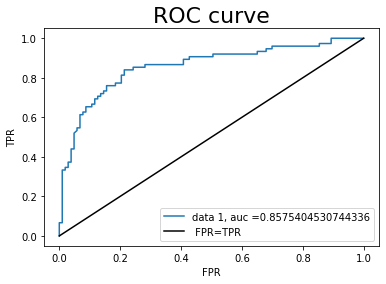

In [120]:
# let's find TPR and FPR
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.title('ROC curve', size=22)
plt.show()

It is showing the performance of the classification model at all classification thresholds 
so lets say if we take the threshold as 0.2 then tpr will be that more the 50% but we if increase the threshold value let's say as 0.6 then tpr of the threshold will be more than 80% 

from the AUC it is showing the the value is good and model is good to classify

## let's do hyperparameter tunning

In [121]:
## another method to do hyperparamter tunning 
logModel = LogisticRegression()


In [122]:
# created teh param_grid variables for various tune
param_grid = [
    {
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4, 4, 20),
        'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 1000, 2500, 5000]
    }
]

In [123]:
# gridsearchCV to get the best model with parameters optimization
from sklearn.model_selection import GridSearchCV

In [124]:
# creating the classification instance
clf  = GridSearchCV(logModel, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

In [125]:
# fitting the model 
best_clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1276 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 3660 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4793 out of 4800 | elapsed:  1.8min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.9min finished


In [126]:
# let's print the model with pramters
best_clf

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [127]:
# printin accuracy of the model
print("Accuracy ",best_clf.score(x_test,y_test))
y_pred = best_clf.predict(x_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy  0.8089887640449438
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.78      0.76      0.77        75

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



AUC 0.856


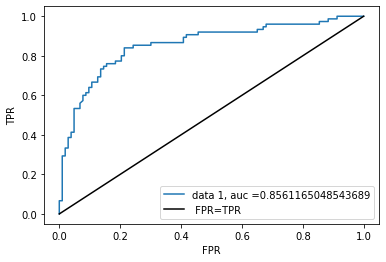

In [128]:
probab_pred = best_clf.predict_proba(x_test)[::, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

###  model with no hyper parameter showing better results than the model with 

# let's also try to implement this using naive bayes classifier


In [129]:
from sklearn.naive_bayes import GaussianNB

In [130]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [131]:
print('GaussianNB classifier score on training', gnb.score(x_train, y_train))
print('Gaussian Classifier score on test',gnb.score(x_test, y_test))

GaussianNB classifier score on training 0.7876230661040787
Gaussian Classifier score on test 0.7865168539325843


              precision    recall  f1-score   support

           0       0.83      0.84      0.84       103
           1       0.78      0.76      0.77        75

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

AUC 0.856


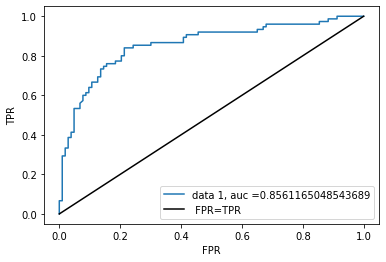

In [132]:
y_pred = best_clf.predict(x_test)

confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
probab_pred = best_clf.predict_proba(x_test)[::, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

## USING SUPPORT VECTOR MACHINE

In [138]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.76      0.71      0.73        75

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178

AUC 0.856


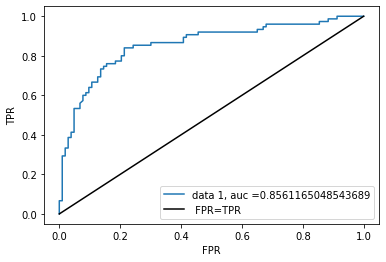

In [139]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
probab_pred = best_clf.predict_proba(x_test)[::, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

## Kernel SVM

In [140]:
#poly
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)


              precision    recall  f1-score   support

           0       0.61      0.97      0.75       103
           1       0.77      0.13      0.23        75

    accuracy                           0.62       178
   macro avg       0.69      0.55      0.49       178
weighted avg       0.67      0.62      0.53       178

AUC 0.856


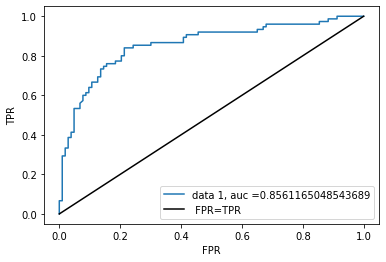

In [141]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
probab_pred = best_clf.predict_proba(x_test)[::, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()

## KNN algorithms

In [158]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       103
           1       0.68      0.51      0.58        75

    accuracy                           0.69       178
   macro avg       0.69      0.67      0.67       178
weighted avg       0.69      0.69      0.68       178

AUC 0.856


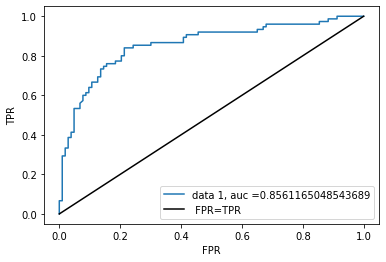

In [159]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
probab_pred = best_clf.predict_proba(x_test)[::, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probab_pred)

auc =  metrics.roc_auc_score(y_test, probab_pred)
print('AUC', round(auc,3))
plt.plot(fpr, tpr, label="data 1, auc ="+str(auc))
a,b = np.array([0,0]), np.array([1,1])
plt.plot([0, 1], [0, 1], color = 'black', label=' FPR=TPR')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.show()